# Notebook motivation 
In this notebook we will check the data that we have save in raw and processed folder


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# first impoort the paths from the config file
from config import settings
from pathlib import Path
print(settings.as_dict())
settings_type = 'SETTINGS1'
data_path = Path(settings.data['path']['raw'])
settings_config = settings.simulation[settings_type]
data_base_path = (data_path/settings_type/settings_type.lower()).with_suffix('.db')

{'DATA': {'PATH': {'raw': '/home/yacine/Documents/PhD/Code/GitProject/PBSHM_mdof/data/raw', 'processed': '/home/yacine/Documents/PhD/Code/GitProject/PBSHM_mdof/data/processed', 'model': '/home/yacine/Documents/PhD/Code/GitProject/PBSHM_mdof/model'}}, 'SIMULATION': {'settings1': {'simu_params': {'dt': 0.0025, 't_end': 20}, 'env_exc_params': {'lat_std': 20, 'lat_mu': 60, 'exc_location': 7, 'exc_amp': 5, 'exc_loc': 10, 'exc_shape': 1.9}, 'population_param': '/home/yacine/Documents/PhD/Code/GitProject/PBSHM_mdof/configuration/systems_healthy.json', 'anomaly_loc': 5, 'resulting_mean_rms': 90}}, 'PROCESSING': {'settings1': {'nperseg': 1024, 'acc_loc': 17, 'filter_params': {'order': 4, 'upper': 150}, 'snr': 'None'}}, 'COMET': {'api_key': 'gd2RifnioVchODAgpk637Br8f', 'workspace': 'yacinebelhadj', 'project_name': 'PSM_mdof'}, 'POPULATION': {'TYPE1': {'PARAM': {'m_mean': [0.5318, 0.404, 0.4101, 0.4123, 0.396, 0.3809, 0.4086, 0.3798], 'k_mean': [0.001, 56700, 56700, 56700, 56700, 56700, 56700, 56

# Latent variables checking

In [4]:
# now let's load the table systems from the sqlite database
import sqlite3
conn = sqlite3.connect(data_base_path)
c = conn.cursor()
c.execute("""SELECT latent FROM simulation""")
latent = c.fetchall()
latent = np.array([l[0] for l in latent])
conn.close()

In [5]:
settings_config

<Box: {'simu_params': {'dt': 0.0025, 't_end': 20}, 'env_exc_params': {'lat_std': 20, 'lat_mu': 60, 'exc_location': 7, 'exc_amp': 5, 'exc_loc': 10, 'exc_shape': 1.9}, 'population_param': '/home/yacine/Documents/PhD/Code/GitProject/PBSHM_mdof/configuration/systems_healthy.json', 'anomaly_loc': 5, 'resulting_mean_rms': 90}>

In [6]:
# compute the number of samples 


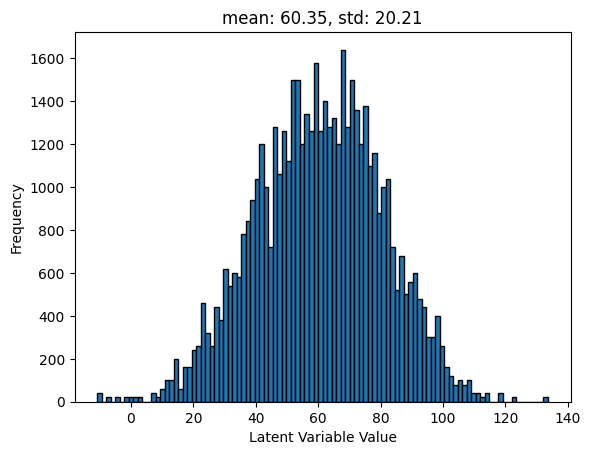

except mean and std: 60.00, 20.00
actual mean and std: 60.35, 20.21


In [7]:
plt.hist(latent, bins=100, edgecolor='black')
plt.title(f'mean: {np.mean(latent):.2f}, std: {np.std(latent):.2f}')
plt.xlabel('Latent Variable Value')
plt.ylabel('Frequency')
plt.show()
print(f'except mean and std: {settings_config["env_exc_params"]["lat_mu"]:.2f}, {settings_config["env_exc_params"]["lat_std"]:.2f}')
print(f'actual mean and std: {np.mean(latent):.2f}, {np.std(latent):.2f}')


# Excitation checking

In [9]:
# now let's load the table systems from the sqlite database
import sqlite3
conn = sqlite3.connect(data_base_path)
c = conn.cursor()
c.execute("""SELECT amplitude FROM simulation""")
amplitude = c.fetchall()
amplitude = np.array([l[0] for l in amplitude])
conn.close()

Text(0, 0.5, 'Frequency')

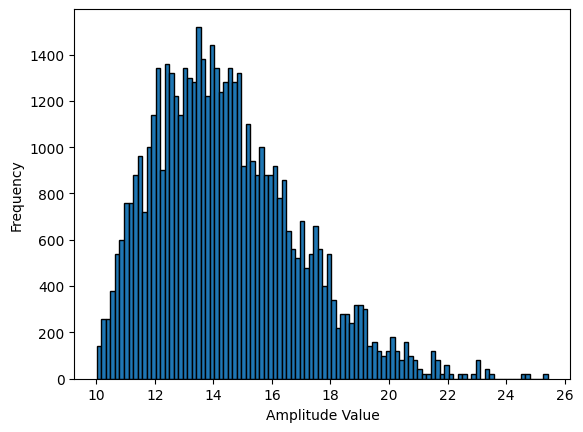

In [10]:
plt.hist(amplitude, bins=100, edgecolor='black')
plt.xlabel('Amplitude Value')
plt.ylabel('Frequency')


In [11]:
# amplitude is a weibull distribution lets check the parameters
from scipy.stats import weibull_min
shape, loc, scale = weibull_min.fit(amplitude)
print(f'except shape, loc, scale: {settings_config["env_exc_params"]["exc_shape"]:.2f}, {settings_config["env_exc_params"]["exc_loc"]:.2f}, {settings_config["env_exc_params"]["exc_amp"]:.2f}')
print(f'actual shape, loc, scale: {shape:.2f}, {loc:.2f}, {scale:.2f}')

except shape, loc, scale: 1.90, 10.00, 5.00
actual shape, loc, scale: 1.90, 9.98, 5.04


# Checking anomaly level

In [12]:
import sqlite3
conn = sqlite3.connect(data_base_path)
c = conn.cursor()
c.execute("""SELECT anomaly_level FROM simulation""")
anomaly_level = c.fetchall()
anomaly_level = np.array([l[0] for l in anomaly_level])
conn.close()

In [13]:
# count the number of anomalies per level
from collections import Counter
print(Counter(anomaly_level))
print("don't forget that we have 20 individuals so we have to divide by 20")





Counter({0.0: 24000, 0.01: 4000, 0.03: 4000, 0.05: 4000, 0.07: 4000, 0.09: 4000, 0.11: 4000, 0.13: 4000})
don't forget that we have 20 individuals so we have to divide by 20


# Checking resonance frequency 

In [16]:
import numpy as np
import sqlite3

conn = sqlite3.connect(data_base_path)
c = conn.cursor()
c.execute("""
SELECT resonance_frequency, name, anomaly_level, latent 
FROM simulation""")
data = c.fetchall()
resonance_frequencies = np.array([np.frombuffer(r[0]) for r in data])
system_name = np.array([r[1] for r in data])
anomaly_level = np.array([r[2] for r in data])
latent = np.array([r[3] for r in data])
conn.close()

## anomaly effect


In [17]:
import matplotlib.cm as cm
def plot_system_data(system_name_input):
    # Select the system based on input name
    selected_system = system_name == system_name_input
    resonance_frequencies_system = resonance_frequencies[selected_system]
    anomaly_level_system = anomaly_level[selected_system]
    latent_system = latent[selected_system]
    # Check the index of switching levels 
    switching_index = np.where(np.diff(anomaly_level_system))[0] + 2
    switching_level = anomaly_level_system[switching_index]
    dict_anomaly = {switching_index[i]:switching_level[i] for i in range(len(switching_index))}


    fig, ax = plt.subplots(figsize=(20,10), ncols=2, nrows=4)
    for i in range(8):
        ax_temp = ax[i//2, i%2]
        scatter = ax_temp.scatter(range(len(resonance_frequencies_system[:, i])), 
                                  resonance_frequencies_system[:, i], 
                                  c=latent_system, cmap=cm.GnBu,
                                  marker='o', s=2)
        bound_y = ax_temp.get_ylim()
        range_y = bound_y[1] - bound_y[0]
        three_quarter_y = bound_y[0] + range_y * 3 / 4
        one_quarter_y = bound_y[0] + range_y / 4
        for k, v in dict_anomaly.items():
            ax_temp.axvline(k, color='red', linestyle='--')
            ax_temp.text(k - 100, three_quarter_y, f'{v}', rotation=90, fontsize=12, zorder=2)
        ax_temp.text(200, one_quarter_y, f'freq {8-i}', fontsize=14, zorder=2)

    # Create colorbar
    cbar = plt.colorbar(cm.ScalarMappable(cmap=cm.GnBu, 
                                          norm=plt.Normalize(vmin=np.min(latent_system), vmax=np.max(latent_system))), 
                        ax=ax.ravel().tolist())
    cbar.set_label('Latent System Value')

    plt.show()


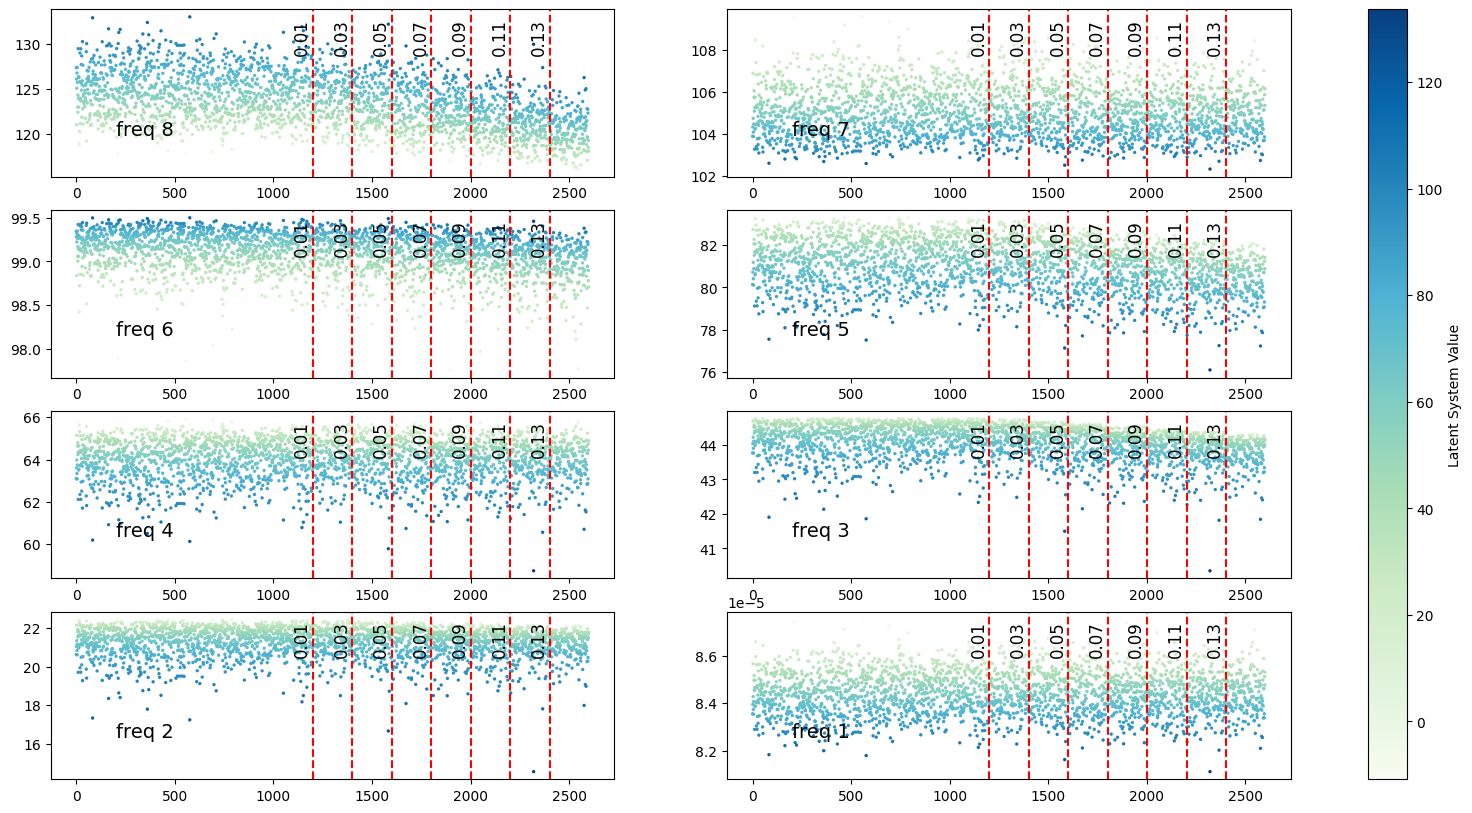

In [19]:
plot_system_data('system_2')

## population difference 


In [20]:
# here we group the data by system name for anomaly level 0 and we check the difference in means
import pandas as pd
res_freq_col = [f'res_freq_{i}' for i in range(8)]
data = {res_freq_col[i]:resonance_frequencies[:, i] for i in range(8)}
rest_data = {'name':system_name, 'anomaly_level':anomaly_level, 'latent':latent}
data.update(rest_data)
df = pd.DataFrame(data)
df_anomaly_0 = df[df['anomaly_level']==0]
df_res = df_anomaly_0.groupby('name').mean().iloc[:,:8]
df_res

,res_freq_0,res_freq_1,res_freq_2,res_freq_3,res_freq_4,res_freq_5,res_freq_6,res_freq_7
name,,,,,,,,
system_0,125.098079,104.949172,99.628195,80.942865,61.873775,44.057350,21.375263,0.000084
system_1,120.458424,107.097433,97.417722,81.750525,62.774789,43.141425,20.846108,0.000083
system_10,123.688583,110.705530,101.432770,83.409186,64.421449,44.605311,21.602403,0.000086
system_11,123.768310,108.759546,103.355616,81.859865,65.312976,44.780443,22.169244,0.000086
system_12,122.239729,105.873252,99.369983,83.191515,63.628692,44.204555,21.501497,0.000085
system_13,120.908619,106.802706,97.454008,80.428157,62.965317,43.631210,21.481334,0.000084
system_14,128.828121,110.523914,101.509642,82.549468,64.909528,44.620312,21.664584,0.000086
system_15,123.650957,112.799599,101.234529,82.157115,65.288244,44.015592,21.846936,0.000086
system_16,126.173718,107.325475,99.186710,79.749262,65.199812,43.293355,21.577703,0.000085


In [21]:
import scipy.stats as stats
cv = stats.variation(df_res)
cv

array([0.02039362, 0.02025816, 0.01797853, 0.01402209, 0.01884279,
       0.01580296, 0.01291307, 0.0096802 ])